### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Асеинова Елизавета Валерьевна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №_3

Текст задания:

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).
2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.
3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.
4. При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с(дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif .
5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).
6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.
7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components ), для которой доля объясняемой дисперсии будет не менее 97.5%.
8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Набор данных: 
Arryhtmia

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).



In [1]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"


In [2]:
import urllib.request

data = urllib.request.urlopen(url) # объект типа 'HTTPResponse'

xList = []
for line in data:
    row = line.strip().decode().split(",") # сплит по запятой
    if len(row) > 1:
        xList.append(row)

In [22]:
print('##### Набор данных Аритмия #####')
print("Число строк = ", len(xList))
print("Число столбцов = ", len(xList[1]))


##### Набор данных Аритмия #####
Число строк =  452
Число столбцов =  280


2. Проведите исследование набора данных, выявляя числовые признаки. Если
какие-то из числовых признаков были неправильно классифицированы, то
преобразуйте их в числовые. Если в наборе для числовых признаков
присутствуют пропущенные значения ('?'), то заполните их медианными
значениями признаков.

In [4]:
import pandas as pd
# считываем данные в объект DataFrame
my_data = pd.read_csv( url, header=None )
my_data

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [5]:
my_data.describe() # сводка данных для числовых столбцов

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
import numpy as np
my_data = my_data.replace('?', np.NaN) # заменим '?' на np.NaN

In [7]:
print('Число записей = %d' % (my_data.shape[0]))
print('Число признаков = %d' % (my_data.shape[1]))
print('Число пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число записей = 452
Число признаков = 280
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0
	9: 0
	10: 8
	11: 22
	12: 1
	13: 376
	14: 1
	15: 0
	16: 0
	17: 0
	18: 0
	19: 0
	20: 0
	21: 0
	22: 0
	23: 0
	24: 0
	25: 0
	26: 0
	27: 0
	28: 0
	29: 0
	30: 0
	31: 0
	32: 0
	33: 0
	34: 0
	35: 0
	36: 0
	37: 0
	38: 0
	39: 0
	40: 0
	41: 0
	42: 0
	43: 0
	44: 0
	45: 0
	46: 0
	47: 0
	48: 0
	49: 0
	50: 0
	51: 0
	52: 0
	53: 0
	54: 0
	55: 0
	56: 0
	57: 0
	58: 0
	59: 0
	60: 0
	61: 0
	62: 0
	63: 0
	64: 0
	65: 0
	66: 0
	67: 0
	68: 0
	69: 0
	70: 0
	71: 0
	72: 0
	73: 0
	74: 0
	75: 0
	76: 0
	77: 0
	78: 0
	79: 0
	80: 0
	81: 0
	82: 0
	83: 0
	84: 0
	85: 0
	86: 0
	87: 0
	88: 0
	89: 0
	90: 0
	91: 0
	92: 0
	93: 0
	94: 0
	95: 0
	96: 0
	97: 0
	98: 0
	99: 0
	100: 0
	101: 0
	102: 0
	103: 0
	104: 0
	105: 0
	106: 0
	107: 0
	108: 0
	109: 0
	110: 0
	111: 0
	112: 0
	113: 0
	114: 0
	115: 0
	116: 0
	117: 0
	118: 0
	119: 0
	120: 0
	121: 0
	122: 0
	123: 0
	124: 0
	125: 0
	126: 0
	127: 0
	128: 0
	129:

In [8]:
my_data[10] = my_data[10].fillna(my_data[10].median())
my_data[11] = my_data[11].fillna(my_data[11].median())
my_data[12] = my_data[12].fillna(my_data[12].median())
my_data[13] = my_data[13].fillna(my_data[13].median())
my_data[14] = my_data[14].fillna(my_data[14].median())

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

In [9]:
my_data

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


В качестве метки класса будет взят столбец 0 с возрастом людей

75    6
56    9
54    9
55    6
13    2
     ..
81    1
8     2
78    2
16    1
76    1
Name: 0, Length: 77, dtype: int64

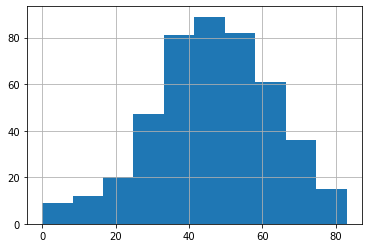

In [10]:
my_data[0].hist(bins=10)
my_data[0].value_counts(sort=False)

In [11]:
my_data[0] = pd.qcut(my_data[0],4).cat.codes
my_data[0].value_counts(sort=False)

3    112
2    101
0    124
1    115
Name: 0, dtype: int64

4. При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с(дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif .

In [12]:
# отбор признаков при помощи одномерных статистических тестов
from sklearn.feature_selection import SelectKBest,f_classif

In [13]:
my_data[0] # метка класса

0      3
1      2
2      2
3      2
4      3
      ..
447    2
448    1
449    0
450    0
451    3
Name: 0, Length: 452, dtype: int8

In [14]:
array = my_data.values
X = array[:,0:279] # входные переменные (280 признаков)
Y = array[:,279] # выходная переменная - качество (оценка между 0 и 10)
# отбор признаков
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)
# оценки признаков
print("\nОценки признаков:\n",fit.scores_)
cols = test.get_support(indices=True)
df_new = my_data.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Оценки признаков:
 [4.60114814e+00 4.79354888e+00 4.14879517e+00 4.34944068e+00
 3.22202827e+01 6.23729076e+00 1.37391229e+01 1.19603044e+01
 6.75565118e+00 2.21331052e+00 2.15260118e+00 6.87470660e-01
 3.49666114e+00 2.91287434e+00 2.50978677e+01 3.81805633e+00
 2.56361350e+01 5.55136640e+00 1.05904933e+00            nan
 1.39328502e+01 7.67956370e-01 3.44774065e+00 6.63568386e-01
 6.33207488e-01 3.39144003e+00 5.22784965e+00 7.47967605e+00
 9.56611904e+00 5.92189551e+00 7.45913910e+00 7.25308610e-01
 1.03459769e+01 3.37784039e-01 2.15746287e+00 7.67956370e-01
 2.06407749e+00 3.32969681e-01 2.92326949e+00 5.50341018e+00
 1.13244485e+00 6.92192427e+00 1.17439805e+00 2.04066583e-01
 3.10011578e+00 6.86634085e-02 4.90356319e-01 6.86634085e-02
 3.81646004e-01 1.23537518e+00 1.74799182e+00 1.00481353e+01
 7.03816731e+00 3.47758823e+00 2.71397194e+00 6.86634085e-02
 5.83021559e+00 2.43719203e-01 6.33207488e-01 3.32969681e-01
 1.74799182e+00 1.74799182e+00 5.26074786e+00 3.83800240e+00
 7.4

D:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 19  67  69  83 131 132 139 141 143 145 151 156 157 164 204 264 274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Отобраны признаки 111 и 240

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).

In [15]:
corr_matrix = my_data[[0,111,240]].corr()
corr_matrix

,0,111,240
0,1.000000,0.070368,-0.019205
111,0.070368,1.000000,-0.887884
240,-0.019205,-0.887884,1.000000


In [16]:
import matplotlib.pyplot as plt

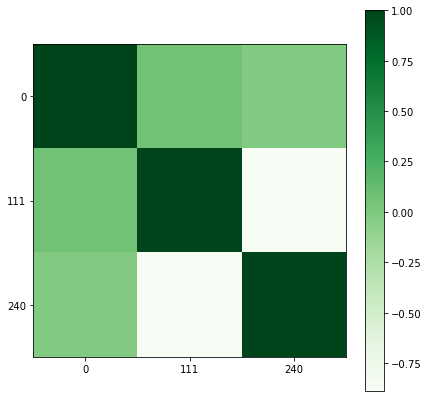

In [17]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar() # добавим шкалу интенсивности цвета
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

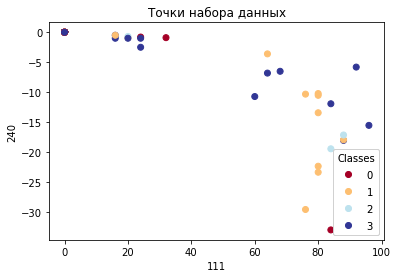

In [18]:
X1 = my_data[111]
X2 = my_data[240]
Y = my_data[0]
fig, ax = plt.subplots()
scatter = ax.scatter(X1, X2, c = Y, cmap = plt.cm.RdYlBu)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Classes")
ax.add_artist(legend1)
plt.title('Точки набора данных')
plt.xlabel('111')
plt.ylabel('240')
plt.show()

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components ), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [19]:
from sklearn.decomposition import PCA
for r in range(30,50):
    pca = PCA( n_components = r )
    pca.fit( my_data )
    print( "r =",r,"\tДисперсия =",
    sum(pca.explained_variance_ratio_)*100,"%" )

r = 30 	Дисперсия = 92.37423012317456 %
r = 31 	Дисперсия = 92.82327731370435 %
r = 32 	Дисперсия = 93.24476040500772 %
r = 33 	Дисперсия = 93.64726302630504 %
r = 34 	Дисперсия = 94.019982866952 %
r = 35 	Дисперсия = 94.3541692589284 %
r = 36 	Дисперсия = 94.6747800618296 %
r = 37 	Дисперсия = 94.97400756673834 %
r = 38 	Дисперсия = 95.2594675144481 %
r = 39 	Дисперсия = 95.5214442126319 %
r = 40 	Дисперсия = 95.7667938385832 %
r = 41 	Дисперсия = 95.99361658294117 %
r = 42 	Дисперсия = 96.21829171586359 %
r = 43 	Дисперсия = 96.43717059291941 %
r = 44 	Дисперсия = 96.64782055329711 %
r = 45 	Дисперсия = 96.85018395371074 %
r = 46 	Дисперсия = 97.04528072175472 %
r = 47 	Дисперсия = 97.2178871661171 %
r = 48 	Дисперсия = 97.38705317275594 %
r = 49 	Дисперсия = 97.53398686610609 %


Для r = 49 доля объясняемой дисперсии будет не менее 97.5%

8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [20]:
pca = PCA(n_components=2)
pcad = pca.fit_transform(my_data) # numpy array
print( "*** Первые 5 строк данных:" )
for x in range(0,5):
    print( pcad[x] )
    
print( "*** Дисперсии компонент:\n", pca.explained_variance_ratio_)

*** Первые 5 строк данных:
[ 28.02518781 -41.70481997]
[-12.27934395 -12.50807357]
[-60.09050983  36.88016562]
[  7.66745506 -51.67492498]
[ 43.12092434 -33.04970585]
*** Дисперсии компонент:
 [0.15715604 0.10020893]


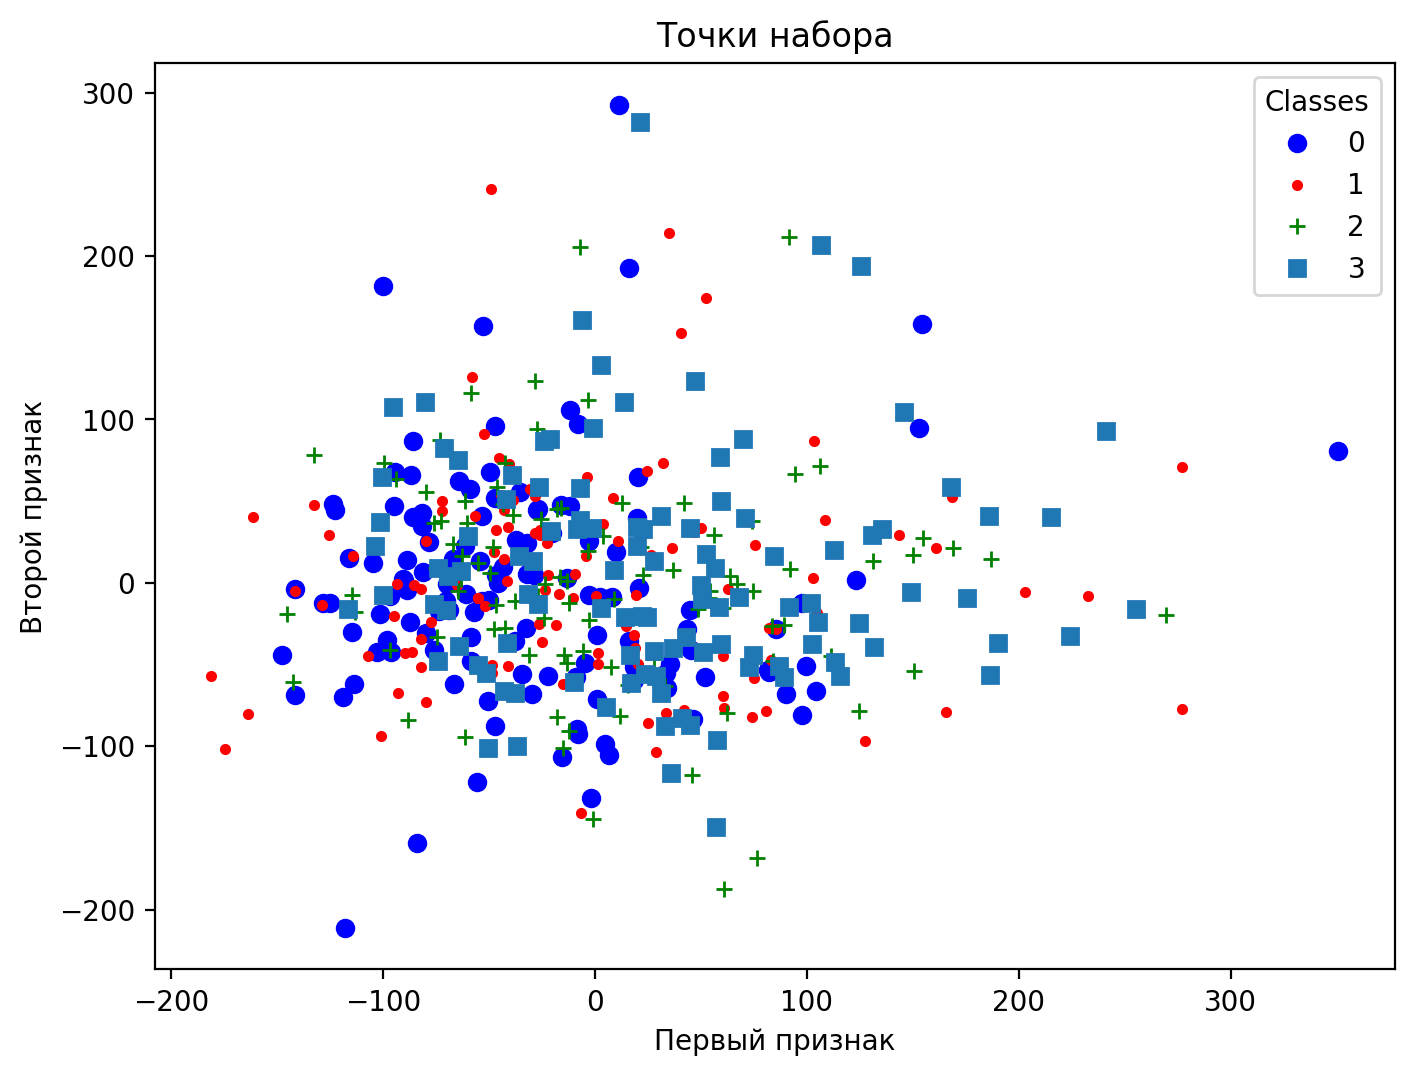

In [21]:
target = my_data[0].to_numpy()
plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(pcad[target == 0,0], pcad[target== 0,1],"bo", label = '0')
plt.plot(pcad[target== 1,0], pcad[target== 1,1],"r.", label = '1')
plt.plot(pcad[target==2,0], pcad[target==2,1],"g+", label = '2')
plt.plot(pcad[target == 3,0], pcad[target == 3,1 ],"s", label = '3')
plt.title("Точки набора")
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
plt.legend(title = 'Classes')